# Further Reading

##  Generic Keywords 
Quantum chemistry packages use gaussian type orbitals (GTO) or  slater type orbitals (STO) to perform the simulation. The packages use the same standards for the basis set and it will be really handy if we can defined a "generic" keyword for basis sets.
Fortunately ``qmflows`` already offers such keyword that can be used among the packages that use the same basis standard,

Internally **QMflows** will create a hierarchical structure representing basis *DZP* for the packages that can handle that basis set.
Other generic keyowrds like: ``functional``, ``inithess``, etc. have been implemented. 

The Following table describes some of the available generic keywords and the Packages where the funcionality is implemented

| Generic  Keyword        | Packages   | Description  |
| :-------------: |:-------------:| :-----:|
|basis | ADF, CP2K, Orca | Set the Basis set |
|cell_angles| CP2K| Specified the angles of the unit cell|
| cell_parameters| CP2K|  Specified the vectors of the unit cell|
| constraint | ADF, Orca| Constrain the distance, angle or dihedral angle for a set of molecules
|freeze| ADF, Gamess, Orca | Freeze a set of atoms indicated by their indexes or symbols|
|functional| ADF, CP2K| Set the DFT functional |
| inithess | ADF, Orca| Provide an initial Hessian matrix|
| optimize| ADF, DFTB, Orca | Perform a molecular optimization|
|selected_atoms| ADF, Gamess, Orca | Optimize the given set of atoms while keeping the rest fixed|
| ts| ADF, DFTB, Orca | Carry out a transition state optimization|

Note: **QMflows** Does not have chemical intuition and if you provide a meaningless keyword,
like a wrong basis set it will not warm you.



## Templates 

As has been shown so far,  **Settings** can be specified in two ways: generic or specific. Generic keywords represent input properties that are present in most simulation packages like a *basis set* while *specific* keywords resemble the input structure of a given package.
 
*Generic* and *Specific* **Settings**  can express both simple and complex simulation inputs,  but it would be nice if we can pre-defined a set of templates for the most common quantum chemistry simulations like: single point calculations, geometry optimizations, transition state optimization, frequency calculations, etc.
*qmflows* already has a pre-defined set of templates  containing some defaults that the user can modify for her/his own purpose. ``Templates`` are stored inside the ``qmflows.templates`` module and are load from *JSON* files. A JSON file is basically a nested dictionary that is translated to a ``Settings`` object by *qmflows*.

Below it is shown the defaults for single point calculation

We use two *generic*  keywords: `freeze` to indicate a constrain and `basis` to provide the basis set. Also, we introduce an specific `ADF` keywords `core = Large`.
Now you merge your **Settings** with the correspoding template to carry out molecular geometry optimizations, using a method called `overlay`.

Below it is shown a combination of templates, generic  and specific keywords to generate the input for a ``CP2K`` job

## Molecule
The next component to carry out a simulation is a molecular geometry.  *qmflows* offers a convinient way to read Molecular geometries using the [Plams](https://www.scm.com/doc/plams/molecule.html) library in several formats like: *xyz* , *pdb*, *mol*, etc.

You can also create the molecule one atom at a time

**QMflows** Can also handle smiles as shown below

The Molecule class has an extensive functionally to carry out molecular manipulations, for a comprenhesive disccusion about it have a look at the [molecule documentation](https://www.scm.com/doc/plams/molecule.html). Also the module ``qmflows.molkit`` contains an extensive functionality to apply transformation over a molecule using the [RDKit](http://www.rdkit.org/) library.

##  Runinng a quantum mechanics simulation
We now have our components to perform a calculation: **Settings** and **Molecule**. We can now invoke a quantum chemistry package to perform the computation,

##   Extracting Properties

In general, properties are extracted using the standard `Object.attribute` notation in python, as shown below.


```python
result = optmized_mol_adf.molecule
```

Some of the available properties are shown in the following table,

| Property        |type           | Description  |
| :-------------: |:-------------:| :-----:|
|dipole        | Double  | Molecular dipole mopment
| energy      | Double | Total energy |
| enthalpy      | Double     |  Enthalpy |
| gradient | Numpy array |  First derivatives of the energy
| hessian | Numpy array| Second derivative of the energy 
|molecule | Molecule | Object representing a physical entity
| runtime | Double      |  Time spent in the simulation |

On the background *QMflows* has a mechanism to read the properties from the output files and make them available inside Python.

## Communicating different packages

We can use the previous optimized geometry for further calculations using for instance another package like *Orca* to run a frequencies calculation,

Once you run the script an input file for the *ADF*  and *Orca* jobs are created. The *ADF*  input looks like

## Running in a supercomputer
Running in **Cartesius** or **Bazis** through the *Slurm* resource manager can be done using and script like

### Restarting a simulation

If you are running many computationally expensive calculations in a supercomputer, it can happen that the computations take more time than that allowed by the resource manager in your supercomputer and the workflows gets cancel.  But do not worry, you do not need to re-run all the computations. Fortunately, *QMflows* offers a mechanism to restart the workflow computations.

When running a workflow you will see that *QMflows* creates a set of files called ``cache``. These files contain the information about the workflow and its calculation. **In order to restart a workflow you only need to relaunch it**, that's it!


##  Data flow
```python
Here is a brief introduction of the data flow in the program.

(1) Set up the following information

Create a result dir
Create a video dir 
Create a html dir (stocks)
Create a jobstate file (jobstate.txt)

(2) Parce and submit job

Create a job dir
Parce job input, generate sub file to submit job
Submit job and record job information (jobinfo.txt)
Create a rcgeometry.xyz
Create a jobstate file (jobstate.txt)

(3) Check if new result exist 

Check if job is finished, if so, change “True” to “False” in jobstate.txt, and return jobstate.txt
Check if geometry and converge changed
Create result.txt file to record if any new result generated, if there is any change, return value.

(4) Resub

Initiate jobstate.txt (True or False)in both local and remote directory
After job submittion, jobinfo(jobname) is generated.
Each job check will generate new jobinfo. If converge and geometry is renewed, then will be returned
If jobstate is False, then finish cycle.
```

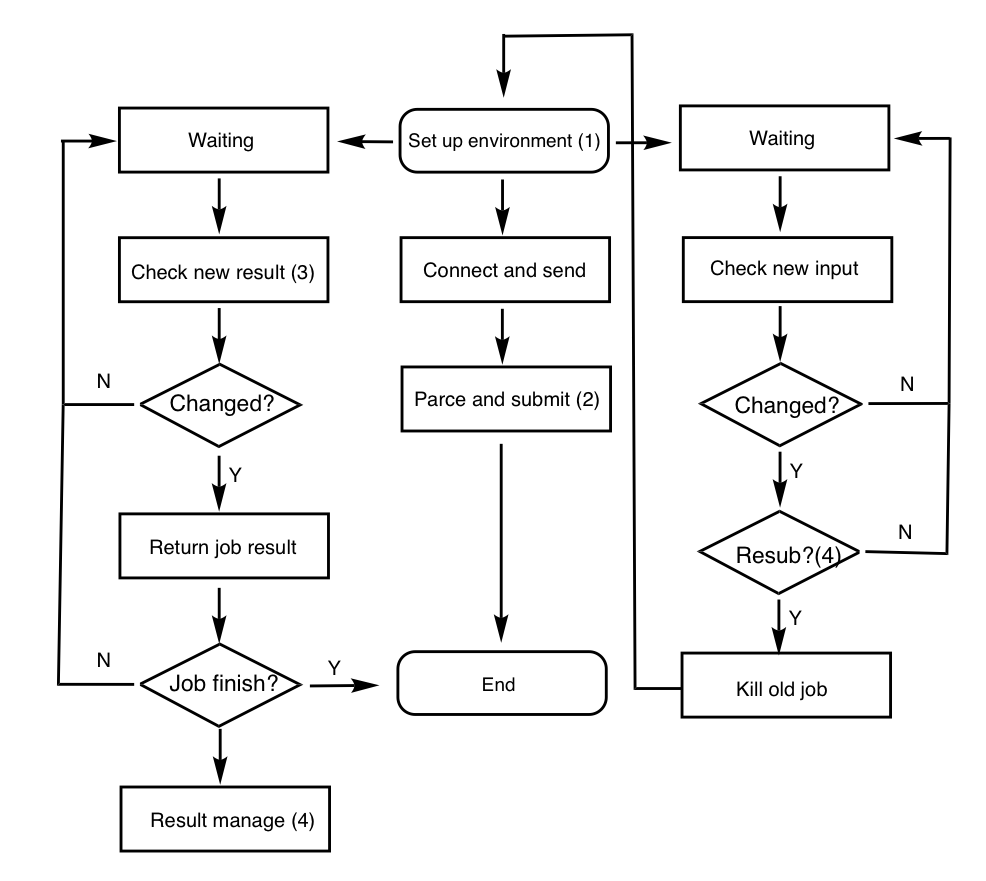

In [1]:
from IPython.display import Image
Image(filename="files/code_flow.png")